In [71]:
import numpy as np
print("Implementing Linear Regression from scracth")

Implementing Linear Regression from scracth


In [72]:
class LinearReg:
  def __init__(self, lr=0.01, n_itr=700):
    self.lr = lr
    self.n_itr = n_itr
    self.weights = None
    self.bias = None

  def fit(self, X , y):
    X = np.asarray(X)
    y = np.asarray(y).ravel()
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_itr):
      y_predict = np.dot(X, self.weights) + self.bias
      dw = (1/n_samples) * np.dot(X.T, (y_predict-y))
      db =  (1/n_samples) * np.sum(y_predict - y)

      self.weights = self.weights - self.lr*dw
      self.bias = self.bias - self.lr*db

  def predict(self, X):
    y_pred = np.dot(X,self.weights) + self.bias
    return y_pred


In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = datasets.make_regression( n_samples=100,n_features=1,noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.8, random_state=1234)

# plt.scatter(X[:,0] ,y, color="b",marker="o" )
# plt.show()


weights: [81.89925692]
bias: -2.0416115541786914


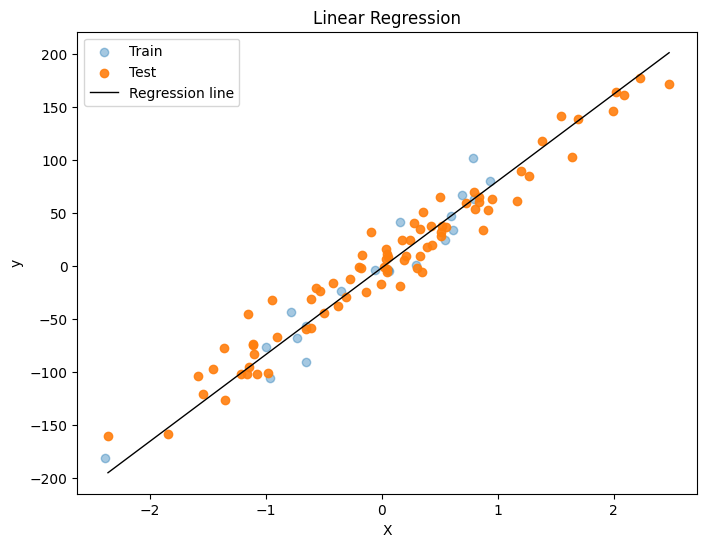

In [74]:
model = LinearReg()
model.fit(X_train,y_train)
print("weights:", model.weights)
print("bias:", model.bias)


predictions = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], y_train, label="Train", alpha=0.4)
plt.scatter(X_test[:,0], y_test, label="Test", alpha=0.9)

ix = np.argsort(X_test[:,0])
plt.plot(X_test[ix,0], predictions[ix], label="Regression line", color='black', linewidth=1)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()